In [28]:
import pickle
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

In [29]:
def max_sqrt_factor(n):
    max_factor = 1
    for i in np.arange(1, np.sqrt(n) + 1, dtype=int):
        if n % i == 0:
            max_factor = i
    return max_factor


def compute_rank(input_shape, units, index, percentage):
    block_shape = (input_shape[index], max_sqrt_factor(units))
    outer_shape = (int(np.prod(input_shape[1:]) / block_shape[0]), units // block_shape[1])
    max_rank = int(min(np.prod(block_shape), np.prod(outer_shape)))
    return max(1, int(max_rank * percentage))

In [46]:
def visualize_krons(k=0):
    results = pickle.load(open('results/401_history.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    #results = {"dense": results}

    names = list(results.keys())

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)

In [44]:
def visualize_dense_only(k=0):
    results = pickle.load(open('models/default_dense_model.dict', 'r'))

    f, axes = plt.subplots(1, 2, figsize=(20, 10))

    ax1, ax2 = axes

    results = {"dense": results}

    names = list(results.keys())

    filtered = [(name, np.mean(results[name]['val_acc'][-10:])) for name in results.keys()]
    from operator import itemgetter
    filtered.sort(key=itemgetter(1), reverse=True)
    filtered = filtered[:]
    filtered_names = zip(*filtered)[0]
    filtered_results = {name: results[name] for name in zip(*filtered)[0]}

    for name in filtered_names:
        train_seq = filtered_results[name]['train_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax1.plot(np.arange(len(train_seq)) + k + 1, train_seq, label=name)

    for name in filtered_names:
        val_seq = filtered_results[name]['val_acc'][k:]
        if 'kron' in name:
            name = name.split(',')[0] + str(compute_rank((None, 64, 7, 7), 1024, 3, float(name.split(',')[1][:-2])))
        ax2.plot(np.arange(len(val_seq)) + k + 1, val_seq, label=name)

    ax1.legend(loc=4)
    ax1.set_xlabel('epoch')
    ax1.set_ylabel('accuracy')
    ax1.set_title('train accuracy')
    ax2.legend(loc=4)
    ax2.set_xlabel('epoch')
    ax2.set_ylabel('accuracy')
    ax2.set_title('validation accuracy')
    #plt.savefig('results_look.png', dpi=200)

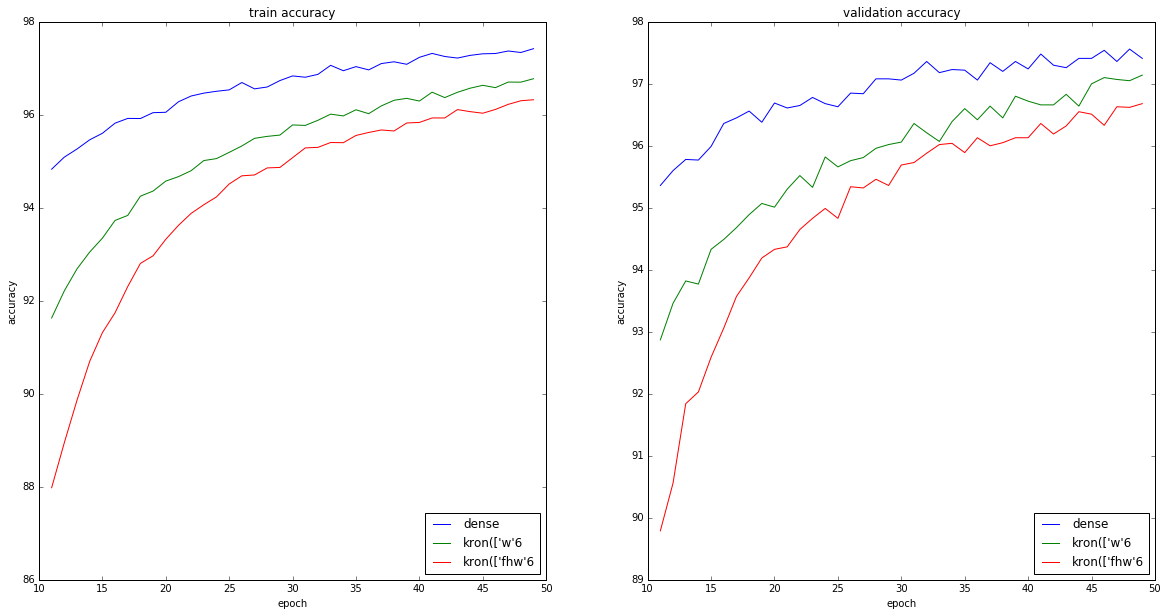

In [48]:
visualize_krons(10)

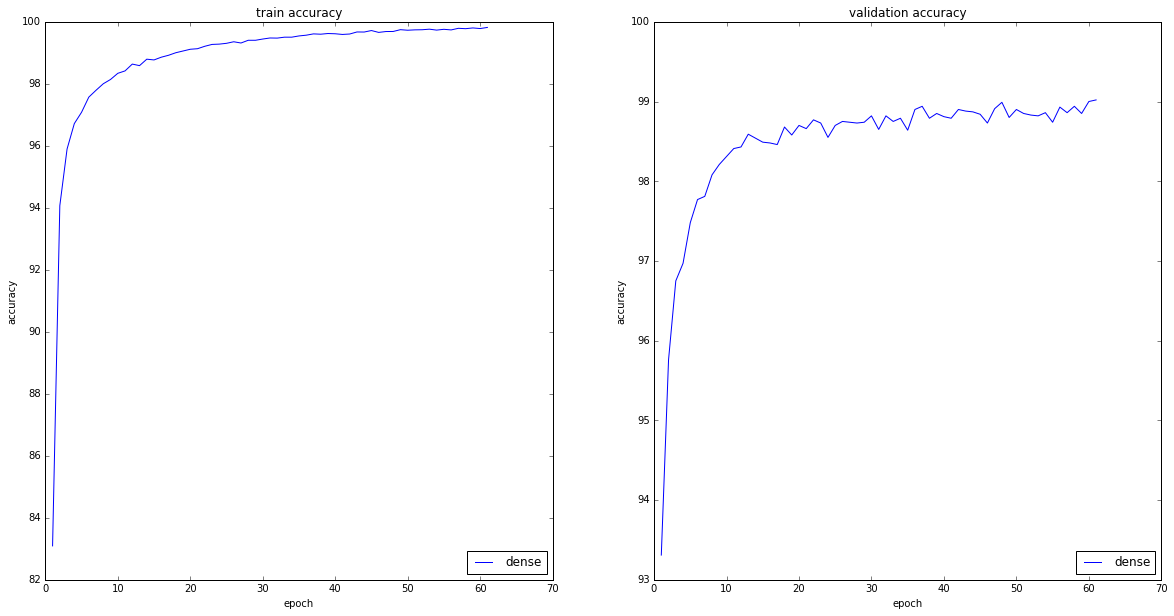

In [49]:
visualize_dense_only(0)